In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')   
import scipy.stats as stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import mean_squared_error
from math import radians, cos, sin, asin, sqrt
from geopy.distance import great_circle
from sklearn.linear_model import Lasso


In [267]:
listing_df = pd.read_csv('listings.csv')

In [245]:
crime_df = pd.read_csv('SA_crime_ward.csv')

NameError: name 'neighbourhoods' is not defined

In [246]:
crime_df.head()

,geo_level,geo_code,0_14,15_24,25_34,35_44,45_54,55_64,65+,total_raw,total_10000 _rounded
0,ward,1.0,33.0,249.0,504.0,276.0,153.0,63.0,39.0,1317.0,188.0
1,ward,2.0,27.0,249.0,408.0,282.0,174.0,69.0,39.0,1248.0,178.0
2,ward,3.0,33.0,243.0,417.0,258.0,132.0,57.0,51.0,1191.0,170.0
3,ward,4.0,39.0,306.0,447.0,309.0,180.0,132.0,90.0,1503.0,215.0
4,ward,5.0,33.0,90.0,282.0,132.0,126.0,72.0,60.0,795.0,114.0


In [247]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,distance_cc,distance_waterfront,distace_wine,distance_airport,price_usd_log,distance_cc_log,availability_log,availability_365_sin,price_log,distance_wine
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,57,-33.94739,18.47600,819,3,...,3.356482,4.390745,22.826170,3.356482,6.708084,1.210893,5.891644,-0.657009,6.708084,22.826170
1,15007,Blaauwberg House,59072,Dirk,NaN,23,-33.80001,18.46063,2050,2,...,8.879955,7.518682,29.050059,8.879955,7.625595,2.183796,5.525453,-0.321594,7.625595,29.050059
3,15077,Top relaxed beach living in style,59342,Georg,NaN,4,-33.85812,18.49043,1620,5,...,5.980151,5.095566,25.194771,5.980151,7.390181,1.788446,5.337538,0.609068,7.390181,25.194771
5,15199,Self catering apartment,59694,Alexa,NaN,115,-33.91044,18.41239,124995,14,...,1.203734,0.663044,27.195878,1.203734,9.080573,0.185428,5.897154,-0.412091,11.736029,27.195878
6,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,71,-34.03863,18.43128,1202,2,...,7.868755,9.350111,23.721691,7.868755,7.091742,2.062900,5.713733,0.986633,7.091742,23.721691


In [73]:
pd.set_option('display.max_columns', 20)

In [74]:
listing_df[listing_df.price > 3000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,Entire home/apt,124995,14,2,2016-04-15,0.03,1,364
11,15704,Hollywood Mansion & Spa Camps Bay with Butler,61441,Kevin,NaN,Ward 54,-33.96462,18.37595,Entire home/apt,17902,4,1,2017-11-14,0.03,7,306
17,19398,Apartments on the Beach,73779,Roger,NaN,Ward 23,-33.73046,18.43966,Entire home/apt,5712,5,0,NaN,NaN,1,365
18,19561,Apartment in Durbanville,74188,Cherry,NaN,Ward 103,-33.84192,18.67661,Private room,3389,2,0,NaN,NaN,1,365
20,19811,MARINA VIEWS,74863,Nigel,NaN,Ward 64,-34.08428,18.47585,Entire home/apt,4694,14,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,43359713,*Special Rate* An Intimate space for lockdown,325262590,Chad,NaN,Ward 74,-34.01306,18.34072,Entire home/apt,4493,3,0,NaN,NaN,2,362
24035,43361480,Brand New Ocean View Villa - 4 bed w Pool & Ga...,12942450,Rich,NaN,Ward 74,-34.03907,18.36526,Entire home/apt,8997,3,0,NaN,NaN,1,248
24040,43385762,Villa Roku. Cape architectural masterpiece.,345670077,Nico,NaN,Ward 54,-33.96599,18.38153,Entire home/apt,13086,2,0,NaN,NaN,1,365
24065,43484784,Ultimate designer home / work / film location!,19745781,Nicholas Sadleir,NaN,Ward 54,-33.92016,18.38954,Entire home/apt,4000,2,1,2020-05-25,1.00,5,90


In [75]:
listing_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [76]:
listing_df.shape

(24079, 16)

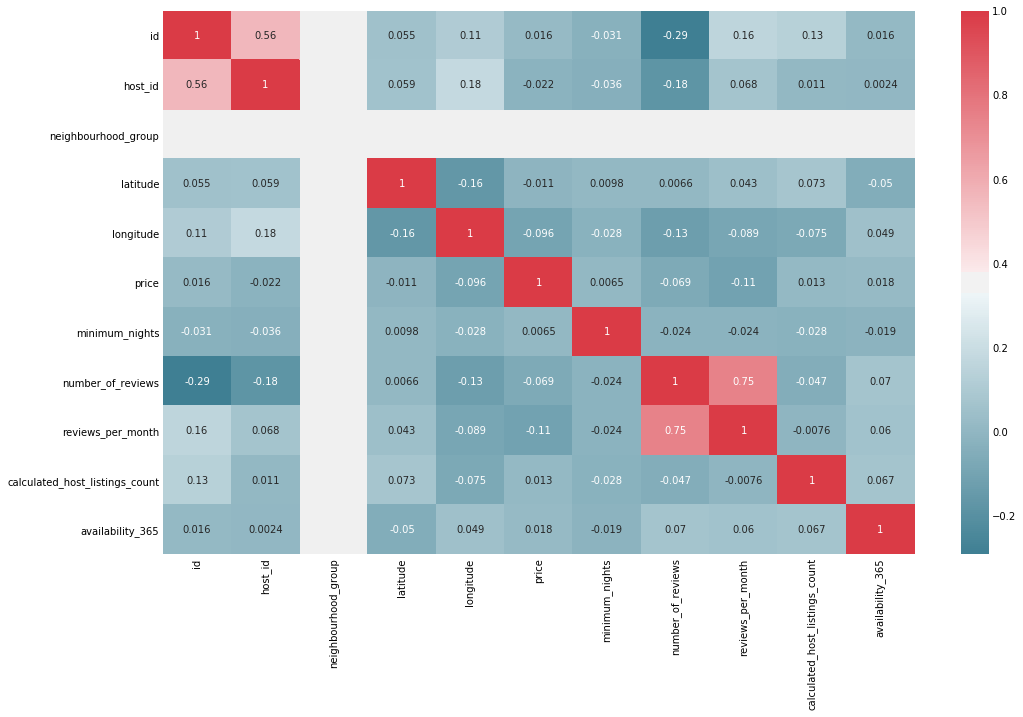

In [77]:
# Baseline Correlation heatmap 

def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(listing_df)

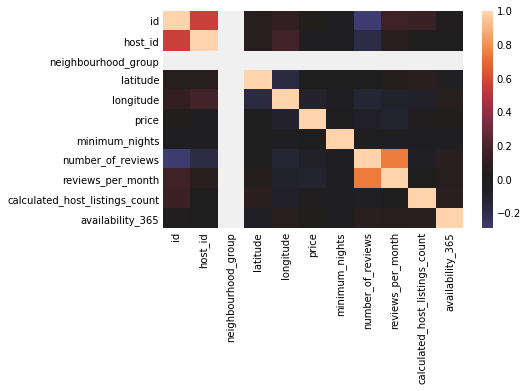

In [78]:
import seaborn as sns
sns.heatmap(listing_df.corr(), center=0);

In [268]:
#Dealing with NAs 
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group               24079
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6823
reviews_per_month                  6823
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [269]:
#because the data set is over 24k, I decided to drop the nan values of reviews and last review (the same rows were nan for each)
listing_df.dropna(subset = ['reviews_per_month', 'last_review'], axis = 0, inplace = True)


In [270]:
listing_df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               17256
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [271]:
listing_df.shape

(17256, 16)

In [83]:
#for neighbourhood_group I plan to imput values based on the Wards, grouping them by where in Capetown they are


In [272]:
#Air BNB zar conversion rate is 14.3 (current rate is 16.5)
listing_df['price_usd'] = listing_df.price.apply(lambda x: x/14.23 if x>= 3000 else x)

In [273]:

listing_df[listing_df.price_usd == 0.0]

#closed listing does not exist 9775 is 20685098
listing_df.drop(9775, inplace = True)


In [274]:
#listing append 9808 is 20736711 price is 121 USD, minimum night 7
listing_df.at[9808, 'price_usd'] = 121
listing_df.at[9808, 'minimum_nights'] = 7

In [256]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price_usd'],
      dtype='object')

In [275]:
listing_df = pd.get_dummies(listing_df, columns=['room_type'])

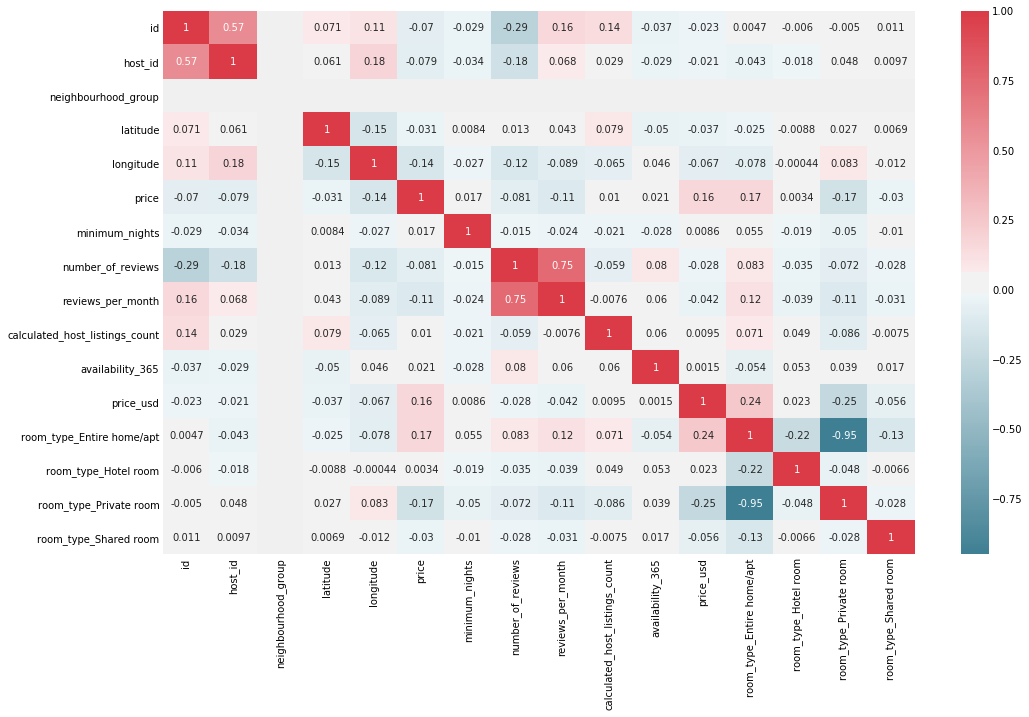

In [89]:
correlation_heatmap(listing_df)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not price_usd_log.

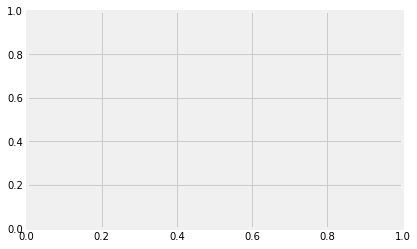

In [276]:
listing_df.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

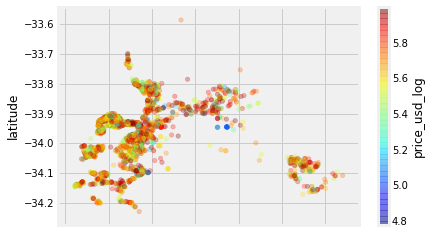

In [151]:
listing_df[listing_df['price_usd_log'].lt(6)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd_log', cmap = plt.get_cmap('jet'))

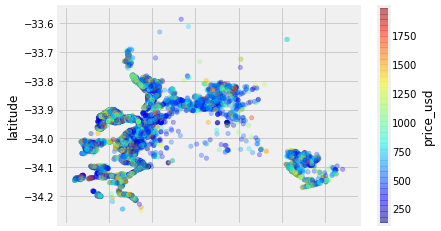

In [152]:
listing_df[listing_df['price_usd'].lt(2000)].plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = .3, c = 'price_usd', cmap = plt.get_cmap('jet'))

In [277]:
listing_df.neighbourhood = listing_df.neighbourhood.map(lambda x: x.replace('Ward', ''))

In [278]:
listing_df.neighbourhood = listing_df.neighbourhood.astype(int)

In [279]:
listing_df.neighbourhood

0         57
1         23
3          4
5        115
6         71
        ... 
23836    115
23849      2
23852     54
23992      5
24065     54
Name: neighbourhood, Length: 17255, dtype: int64

In [281]:
crime_df['']

condition:
choice: 

listing_df['crime'] = listing_df[listing_df['neighbourhood'] == 1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_usd,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
403,1871897,Safe Central GREEN Get-Away home*Uncapped WiFi,9752740,Rixie,NaN,1,-33.87820,18.57935,610,4,14,2020-02-11,0.18,2,352,610.0,1,0,0,0
413,1910455,Safe*Family friendly*Central*Green*Uncapped WiFi,9752740,Rixie,NaN,1,-33.87735,18.57910,923,4,29,2019-06-10,0.37,2,352,923.0,1,0,0,0
437,1968684,"Self-catering apartment with pool,patio & BBQ .",10167418,Judi,NaN,1,-33.88091,18.56882,247,1,5,2017-04-09,0.10,1,0,247.0,1,0,0,0
2657,8295789,Sunny farm house style. Swim pool. Well point.,43741993,Willem,NaN,1,-33.88680,18.56654,1796,2,2,2018-11-10,0.05,1,365,1796.0,1,0,0,0
2691,8360443,Spacious Luxury 1 Bedroom Apartment,44046824,Marietjie,NaN,1,-33.83500,18.54104,405,3,1,2019-01-08,0.06,2,0,405.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22982,42058693,Lovely Guest Suite for Family of 4,140248343,Lizanne,NaN,1,-33.88387,18.59086,644,1,1,2020-02-14,0.29,3,365,644.0,1,0,0,0
22997,42085346,Home away from home,1386027,Nadge,NaN,1,-33.88049,18.55532,424,1,1,2020-02-28,0.30,1,179,424.0,0,0,1,0
23064,42156337,Welcome to CPT convinience and family haven!,334527077,Priscilla,NaN,1,-33.84208,18.54635,697,1,2,2020-03-15,0.63,2,180,697.0,1,0,0,0
23392,42560376,Modern home away from home,230352627,Danielle,NaN,1,-33.84579,18.54992,440,2,3,2020-04-30,1.32,1,0,440.0,1,0,0,0


In [156]:
#city center wards df['city_center'] = wards == 77,54,115
#listing_df['neighbourhood_group'] = listing_df['neighbourhood_group'].map(lambda x: if x == 74]
                                                                          
#[74, 77, 54, 57, 59, 58, 60, 47, 46, 48, 49, 52, 51, 53, 56, 50, 31, 40, 41, 42, 44, 45]
#Metro_North = [4, 5, 1, 27, 26, 30, 28]
#Metro_South = [69, 71, 62, 73, 72, 63, 66, 65, 67, 80, 33, 38, 34, 37, 43] 





In [157]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distace_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log', 'distance_wine'],
      dtype='object')

In [158]:
#distance from city center
# 33.9249° S, 18.4241° E cape town city center


In [159]:
# city center -33.9249, 18.4241
# VA Water Front -33.9036, 18.4205
# Wine Lands -34.075691, 18.843266
# Airport -33.9715, 18.6021


from geopy.distance import great_circle
city_center = (-33.9249,18.4241)
listing_df['distance_cc'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(city_center, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)



In [160]:
va_water = (-33.9036, 18.4205)
listing_df['distance_waterfront'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(va_water, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [161]:
wine_lands = (-34.075691, 18.843266)
listing_df['distance_wine'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(wine_lands, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [162]:
airport = (-33.9249,18.4241)
listing_df['distance_airport'] = listing_df[['latitude', 'longitude']].apply(lambda x: great_circle(airport, 
                                                                                               (x['latitude'], x['longitude'])).miles, axis = 1)




In [163]:
listing_df['distance_cc']

0         3.356482
1         8.879955
3         5.980151
5         1.203734
6         7.868755
           ...    
23836     0.506106
23849    11.165350
23852     2.326342
23992     7.933913
24065     2.008320
Name: distance_cc, Length: 17255, dtype: float64

In [164]:
listing_df['minimum_nights'].unique()

array([   3,    2,    5,   14,    4,    7,    1,    6,   30,   90,  360,
         10,   45,    8,   20,   21,   28,   42,   12,   31,  240,  180,
         15,   60,   11,  365,    9,  120,   13,  210,  356,   25,  100,
         32,   18,   24, 1125,   93,  168,  186,   27,  150,   89,   29,
        300,   94,   22,   33,  183])

In [100]:
#drop or not to drop that is the question
listing_df[listing_df['minimum_nights'] == 1125]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,availability_365,price_usd,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distace_wine,distance_airport
6194,14937323,"Pied a terre,views , chic central",63403205,Manuela,NaN,Ward 115,-33.91182,18.41313,1004,1125,...,0,1004.0,1,0,0,0,1.101073,0.707935,27.117279,1.101073


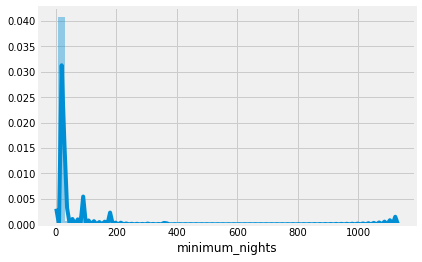

In [101]:
sns.distplot(listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'])

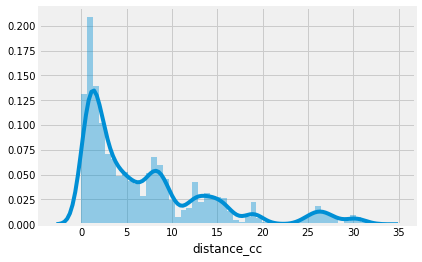

In [102]:
sns.distplot(listing_df['distance_cc'])

In [103]:
sns.jointplot(x = listing_df[listing_df['minimum_nights'] > 7]['minimum_nights'],
               y = listing_df[listing_df['minimum_nights'] > 7]['price_usd_log'])

KeyError: 'price_usd_log'

In [ ]:
# ANOVA
# room_type_Entire home/apt
# distance_cc

# price_usd

In [104]:
listing_df['minimum_nights'] = listing_df['minimum_nights'].astype(int)
listing_df['price_usd'] = listing_df['price_usd'].astype(int)

In [105]:
# minimum nights > 4
# min nights < 4 
# mean min_nights is 3.93
# Prices of Air BNBs with less than 4 minimum nights is statistically different than houses with minimum nights greater or equal to 4. 


x = listing_df[listing_df['minimum_nights'] >= 4]['price_usd_log']
y = listing_df[listing_df['minimum_nights'] < 4]['price_usd_log']
stats.f_oneway(x, y)


KeyError: 'price_usd_log'

In [106]:
# As we get closer the the City Center, the mean of the price changes. 


x = listing_df[listing_df['distance_cc'] >= 10]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 10]['price_usd_log']
ten_miles = stats.f_oneway(x, y)

x = listing_df[listing_df['distance_cc'] >= 8]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 8]['price_usd_log']
eight_miles = stats.f_oneway(x, y)

x = listing_df[listing_df['distance_cc'] >= 1]['price_usd_log']
y = listing_df[listing_df['distance_cc'] < 1]['price_usd_log']
one_mile = stats.f_oneway(x, y)

print('10 miles: ', ten_miles)
print('8 miles: ', eight_miles)
print('1 mile: ', one_mile)


KeyError: 'price_usd_log'

In [107]:
stats.ttest_ind(listing_df[listing_df['distance_cc'] < 1]['price'], listing_df[listing_df['distance_cc'] >= 1]['price_usd']) 

Ttest_indResult(statistic=19.547126431068854, pvalue=3.548545008046792e-84)

In [108]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,availability_365,price_usd,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distace_wine,distance_airport
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,819,3,...,362,819,1,0,0,0,3.356482,4.390745,22.826170,3.356482
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,2050,2,...,251,2050,1,0,0,0,8.879955,7.518682,29.050059,8.879955
3,15077,Top relaxed beach living in style,59342,Georg,NaN,Ward 4,-33.85812,18.49043,1620,5,...,208,1620,0,0,1,0,5.980151,5.095566,25.194771,5.980151
5,15199,Self catering apartment,59694,Alexa,NaN,Ward 115,-33.91044,18.41239,124995,14,...,364,8783,1,0,0,0,1.203734,0.663044,27.195878,1.203734
6,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,NaN,Ward 71,-34.03863,18.43128,1202,2,...,303,1202,1,0,0,0,7.868755,9.350111,23.721691,7.868755


In [109]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [110]:
listing_df['price_usd_log'] = np.log(listing_df['price_usd'])

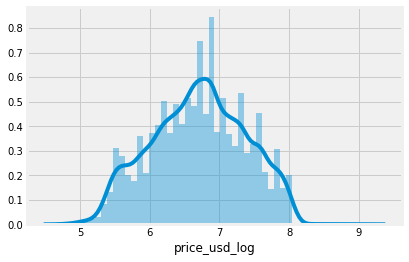

In [111]:
sns.distplot(listing_df['price_usd_log'])

In [112]:
listing_df['distance_cc_log'] = np.log(listing_df['distance_cc'])

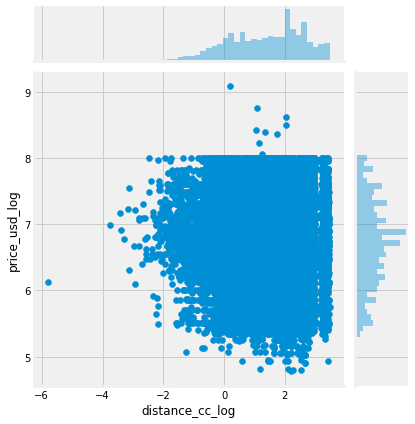

In [113]:
sns.jointplot(x = 'distance_cc_log', y = 'price_usd_log', data = listing_df);

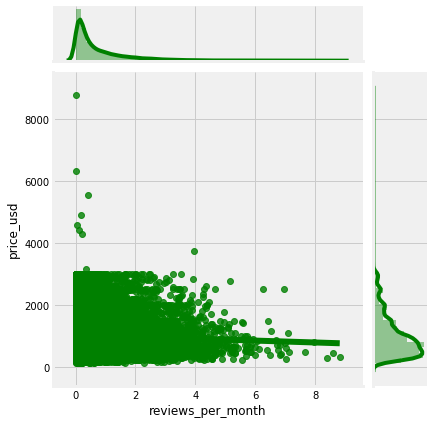

In [114]:
sns.jointplot(x = 'reviews_per_month', y = 'price_usd', data = listing_df, kind = 'reg', color = 'green');

In [115]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distace_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log'],
      dtype='object')

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


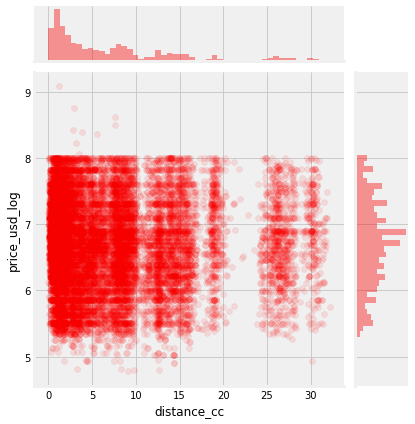

In [116]:
listing_df['availability_log'] = np.log(listing_df['availability_365'])
listing_df['availability_365_sin'] = np.sin(listing_df['availability_365'])
listing_df['price_log'] = np.log(listing_df['price'])
sns.jointplot(x = 'distance_cc', y = 'price_usd_log', data = listing_df, kind = 'scatter', color = 'red', alpha = 0.1);


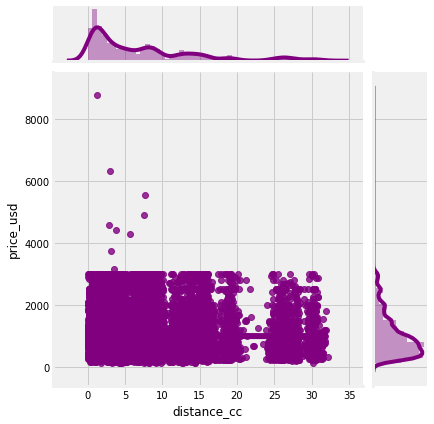

In [117]:
sns.jointplot(x = 'distance_cc', y = 'price_usd', data = listing_df, kind = 'reg', color = 'purple');

In [118]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distace_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [119]:
listing_df.price_usd.describe()

count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [120]:
# baseline model

subset = ['neighbourhood', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', ]
x = listing_df[subset]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(y)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)


rmse:  693.3257724308925 r2:  -0.07212491057954762


In [121]:
rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))
rmse

693.3257724308925

In [122]:
#2nd baseline 
subset2 = ['neighbourhood', 'room_type_Entire home/apt']
x = listing_df[subset2]
y = listing_df['price_usd']

dummy_regr = DummyRegressor(strategy = "mean")
dummy_regr.fit(x, y)
#DummyRegressor()
y_predict = dummy_regr.predict(x)
R2 = dummy_regr.score(x, y)

rmse = np.sqrt(metrics.mean_squared_error(y, y_predict))

print('rmse: ', rmse, 'r2: ', R2)

rmse:  669.5987754252504 r2:  0.0


In [123]:
641

641

In [124]:
# bin the availability

In [ ]:
#CORR CHECK 

In [206]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distace_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log', 'distance_wine'],
      dtype='object')

In [208]:
corr_check = listing_df.corr()

In [221]:
corr_check['distance_airport'] 

# neighbourhood = no conflicts
# latitude = no conflicts
# longitude = over .7 with distance airport, cc, waterfront
# number of reviews = over .7 reviews_per_month 
# availability 365 = over .7 availability log 
# entire house no conflicts 
# distance cc conflicts with distance waterfront and longitude 
# distance 

id                                0.042941
host_id                           0.118423
neighbourhood_group                    NaN
neighbourhood                    -0.263255
latitude                         -0.545939
longitude                         0.748365
price                            -0.067390
minimum_nights                   -0.036470
number_of_reviews                -0.144318
reviews_per_month                -0.143397
calculated_host_listings_count   -0.138560
availability_365                  0.099603
price_usd                        -0.009467
room_type_Entire home/apt        -0.041639
room_type_Hotel room              0.005296
room_type_Private room            0.045469
room_type_Shared room            -0.023797
distance_cc                       1.000000
distance_waterfront               0.992647
distace_wine                     -0.735827
distance_airport                  1.000000
price_usd_log                    -0.017601
distance_cc_log                   0.852881
availabilit

In [125]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_usd',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distace_wine', 'distance_airport',
       'price_usd_log', 'distance_cc_log', 'availability_log',
       'availability_365_sin', 'price_log'],
      dtype='object')

In [222]:
subset3 = ['minimum_nights','number_of_reviews', 'neighbourhood', 'availability_365', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room','room_type_Shared room', 'distance_cc', 'distance_waterfront', 'distance_airport', 'distance_wine', 'latitude']


df_features = listing_df[subset3]
target = listing_df['price_usd_log']
len(subset3)

13

In [223]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias = False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
model2 = LinearRegression()

model2 = model2.fit(df_poly2, target)

In [224]:
model2 = sm.OLS(y, poly2_data).fit()
model2.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_usd_log   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     36.27
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:04:32   Log-Likelihood:                -16366.
No. Observations:               17255   AIC:                         3.287e+04
Df Residuals:                   17184   BIC:                         3.342e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0800      0.387      0.207      0.836      -0.679       0.839
x2           751.3483    661.977      1.135      0.256    -546.195    2048.891
x3          -860.6130    758.094     -1.135      0.256   -2346.555     625.329
x4           100.4215     88.457      1.135      0.256     -72.963     273.806
x5         -6.366e+06   5.61e+06     -1.135      0.256   -1.74e+07    4.62e+06
x6         -6.368e+06   5.61e+06     -1.135      0.256   -1.74e+07    4.63e+06
x7         -6.365e+06   5.61e+06     -1.135      0.256   -1.74e+07    4.62e+06
x8         -6.367e+06   5.61e+06     -1.135      0.256   -1.74e+07    4.63e+06
x9          -559.6429    487.020     -1.149      0.251   -1514.252     394.966
x10          -28.3974     42.547     -0.667      0.504    -111.793      54.999
x11          415.9594    372.453      1.117      0.264    -314.087    1146.006
x12         -142.0184    125.656     -1.130      0.258    -388.316     104.280
x13        -3.499e+05   3.08e+05     -1.134      0.257   -9.54e+05    2.55e+05
x14        -1.787e-06   1.57e-06     -1.137      0.256   -4.87e-06    1.29e-06
x15          1.13e-05   1.51e-05      0.748      0.454   -1.83e-05    4.09e-05
x16         5.137e-06   1.58e-05      0.324      0.746   -2.59e-05    3.62e-05
x17        -4.222e-06    3.4e-06     -1.242      0.214   -1.09e-05    2.44e-06
x18            0.0102      0.099      0.103      0.918      -0.183       0.204
x19            0.0283      0.109      0.260      0.795      -0.186       0.242
x20            0.0035      0.099      0.036      0.972      -0.190       0.197
x21            0.0492      0.118      0.418      0.676      -0.181       0.280
x22          -45.9375     40.461     -1.135      0.256    -125.245      33.370
x23           -0.0018      0.001     -1.714      0.086      -0.004       0.000
x24           45.9390     40.461      1.135      0.256     -33.369     125.247
x25           -0.0006      0.000     -2.887      0.004      -0.001      -0.000
x26            0.0021      0.014      0.149      0.881      -0.026       0.030
x27         3.325e-06   1.69e-06      1.969      0.049    1.48e-08    6.63e-06
x28          8.91e-08   6.05e-06      0.015      0.988   -1.18e-05    1.19e-05
x29         3.366e-06   1.21e-06      2.773      0.006    9.87e-07    5.74e-06
x30         -751.6445    661.975     -1.135      0.256   -2049.182     545.893
x31         -751.6371    661.974     -1.135      0.256   -2049.175     545.900
x32         -751.6462    661.975     -1.135      0.256   -2049.184     545.891
x33         -751.6477    661.975     -1.135      0.256   -2049.185     545.890
x34           26.0571     22.950      1.135      0.256     -18.928      71.042
x35           -0.0001      0.000     -0.390      0.697      -0.001       0.000
x36          -26.0571     22.950     -1.135      0.256     -71.042      18.928
x3

In [225]:
from sklearn.preprocessing import PolynomialFeatures

poly_3 = PolynomialFeatures(degree=3, include_bias = False)
poly3_data = poly_3.fit_transform(df_features)
poly3_columns = poly_3.get_feature_names(df_features.columns)
df_poly3 = pd.DataFrame(poly3_data, columns = poly3_columns)
model3 = LinearRegression()

model3 = model3.fit(df_poly3, target)

In [226]:
poly3_columns

['minimum_nights',
 'number_of_reviews',
 'neighbourhood',
 'availability_365',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'distance_cc',
 'distance_waterfront',
 'distance_airport',
 'distance_wine',
 'latitude',
 'minimum_nights^2',
 'minimum_nights number_of_reviews',
 'minimum_nights neighbourhood',
 'minimum_nights availability_365',
 'minimum_nights room_type_Entire home/apt',
 'minimum_nights room_type_Hotel room',
 'minimum_nights room_type_Private room',
 'minimum_nights room_type_Shared room',
 'minimum_nights distance_cc',
 'minimum_nights distance_waterfront',
 'minimum_nights distance_airport',
 'minimum_nights distance_wine',
 'minimum_nights latitude',
 'number_of_reviews^2',
 'number_of_reviews neighbourhood',
 'number_of_reviews availability_365',
 'number_of_reviews room_type_Entire home/apt',
 'number_of_reviews room_type_Hotel room',
 'number_of_reviews room_type_Private room',
 'number_of_reviews roo

In [227]:
model3 = sm.OLS(y, poly3_data).fit()
model3.summary()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_usd_log   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     11.72
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:04:48   Log-Likelihood:                -16009.
No. Observations:               17255   AIC:                         3.259e+04
Df Residuals:                   16970   BIC:                         3.480e+04
Df Model:                         284                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.5018      4.116     -0.608      0.543     -10.570       5.566
x2           -26.1447     43.402     -0.602      0.547    -111.218      58.929
x3           -16.8557     82.934     -0.203      0.839    -179.415     145.703
x4          -2.17e+04   5.24e+04     -0.414      0.679   -1.24e+05     8.1e+04
x5           523.0535    918.408      0.570      0.569   -1277.122    2323.229
x6           567.2054    916.677      0.619      0.536   -1229.577    2363.987
x7           510.6975    915.766      0.558      0.577   -1284.298    2305.693
x8         -1584.6588   2747.904     -0.577      0.564   -6970.836    3801.518
x9            85.0718     41.221      2.064      0.039       4.275     165.869
x10         -127.7281     54.705     -2.335      0.020    -234.956     -20.500
x11           85.3858     41.267      2.069      0.039       4.497     166.274
x12          -31.2500     64.118     -0.487      0.626    -156.928      94.428
x13         -456.6345    141.794     -3.220      0.001    -734.565    -178.704
x14            0.0187      0.088      0.214      0.831      -0.153       0.191
x15           -0.0310      0.105     -0.296      0.767      -0.237       0.175
x16            0.0830      0.048      1.726      0.084      -0.011       0.177
x17            0.0398      0.073      0.547      0.584      -0.103       0.182
x18          -55.3446     57.051     -0.970      0.332    -167.170      56.481
x19          -27.5168     69.996     -0.393      0.694    -164.717     109.683
x20          -53.4020     57.036     -0.936      0.349    -165.199      58.394
x21          139.7464    173.069      0.807      0.419    -199.486     478.979
x22           -1.0083      1.247     -0.809      0.419      -3.452       1.435
x23            2.5844      2.535      1.019      0.308      -2.385       7.554
x24           -1.0341      1.248     -0.829      0.407      -3.479       1.411
x25            0.0451      0.309      0.146      0.884      -0.560       0.650
x26           20.8473     17.782      1.172      0.241     -14.007      55.702
x27            0.0053      0.007      0.728      0.466      -0.009       0.019
x28            0.0122      0.009      1.413      0.158      -0.005       0.029
x29           -0.0197      0.031     -0.637      0.524      -0.080       0.041
x30           -7.5867     17.284     -0.439      0.661     -41.465      26.292
x31           -8.3134     17.486     -0.475      0.634     -42.588      25.961
x32           -7.3727     17.280     -0.427      0.670     -41.243      26.498
x33            1.6691     40.963      0.041      0.967     -78.622      81.960
x34            0.5218      0.312      1.675      0.094      -0.089       1.132
x35           -1.1436      0.620     -1.844      0.065      -2.359       0.072
x36            0.6128      0.312      1.966      0.049       0.002       1.224
x3

In [228]:
#using sklearn.model_selection we will be using the train test split
#we name them as xtrain and ytrain then xtest and ytest
from sklearn.model_selection import train_test_split

#scale data 
scaler = StandardScaler()
x_standin = scaler.fit_transform(df_features)
x_standin = pd.DataFrame(data = target, columns = df_features.columns)

x_train, x_test, y_train, y_test = train_test_split(df_features, target, random_state = 42, test_size=0.2)

print('Training set - Features:', x_train.shape, 'Target:', y_train.shape)
print('Training set - Features:', x_test.shape, 'Target:', y_test.shape)

Training set - Features: (13804, 13) Target: (13804,)
Training set - Features: (3451, 13) Target: (3451,)


In [229]:


model_lr = LinearRegression()
model_lr = model_lr.fit(x_train, y_train)
y_train_pred = model_lr.predict(x_train)
y_test_pred = model_lr.predict(x_test)

y = listing_df['price_usd']
x = df_features



In [230]:
y.describe()


count    17255.000000
mean      1009.827992
std        669.618179
min        119.000000
25%        505.000000
50%        830.000000
75%       1344.000000
max       8783.000000
Name: price_usd, dtype: float64

In [231]:
df_features

,minimum_nights,number_of_reviews,neighbourhood,availability_365,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,distance_cc,distance_waterfront,distance_airport,distance_wine,latitude
0,3,54,57,362,1,0,0,0,3.356482,4.390745,3.356482,22.826170,-33.94739
1,2,27,23,251,1,0,0,0,8.879955,7.518682,8.879955,29.050059,-33.80001
3,5,5,4,208,0,0,1,0,5.980151,5.095566,5.980151,25.194771,-33.85812
5,14,2,115,364,1,0,0,0,1.203734,0.663044,1.203734,27.195878,-33.91044
6,2,8,71,303,1,0,0,0,7.868755,9.350111,7.868755,23.721691,-34.03863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23836,1,2,115,330,1,0,0,0,0.506106,1.540886,0.506106,26.620631,-33.92548
23849,1,2,2,77,1,0,0,0,11.165350,11.228055,11.165350,17.867290,-33.89843
23852,2,1,54,343,1,0,0,0,2.326342,2.532526,2.326342,28.350356,-33.92368
23992,1,1,5,172,1,0,0,0,7.933913,7.649125,7.933913,21.672786,-33.87748


In [232]:
out = listing_df.reset_index(drop=True).T.drop_duplicates().T.set_index(listing_df.index)


In [233]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17255 entries, 0 to 24065
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   minimum_nights             17255 non-null  int64  
 1   number_of_reviews          17255 non-null  int64  
 2   neighbourhood              17255 non-null  int64  
 3   availability_365           17255 non-null  int64  
 4   room_type_Entire home/apt  17255 non-null  uint8  
 5   room_type_Hotel room       17255 non-null  uint8  
 6   room_type_Private room     17255 non-null  uint8  
 7   room_type_Shared room      17255 non-null  uint8  
 8   distance_cc                17255 non-null  float64
 9   distance_waterfront        17255 non-null  float64
 10  distance_airport           17255 non-null  float64
 11  distance_wine              17255 non-null  float64
 12  latitude                   17255 non-null  float64
dtypes: float64(5), int64(4), uint8(4)
memory usage

In [234]:

y = listing_df['price_usd_log']
x= df_features
x= sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

In [235]:
df_features.columns

Index(['minimum_nights', 'number_of_reviews', 'neighbourhood',
       'availability_365', 'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'distance_cc',
       'distance_waterfront', 'distance_airport', 'distance_wine', 'latitude'],
      dtype='object')

In [236]:
#calculate training errors
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.5098091858850178
Mean Squared Error: 0.4019329052394537
Root Mean Squared Error: 0.6339817862048197


In [237]:
#calculte test errors 
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:', mae )
print('Mean Squared Error:',  mse)
print('Root Mean Squared Error:' , rmse)

Mean Absolute Error: 0.5109319504076221
Mean Squared Error: 0.404536372568748
Root Mean Squared Error: 0.6360317386489043


In [238]:
model3 = LinearRegression()
model3 = model3.fit(x_train, y_train)
y_train_pred = model3.predict(x_train)
y_test_pred = model3.predict(x_test)

In [239]:
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse))

Training Error: 0.5098091858850178
Testing Error: 0.6739526194185214


In [240]:

lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train,y_train)
y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

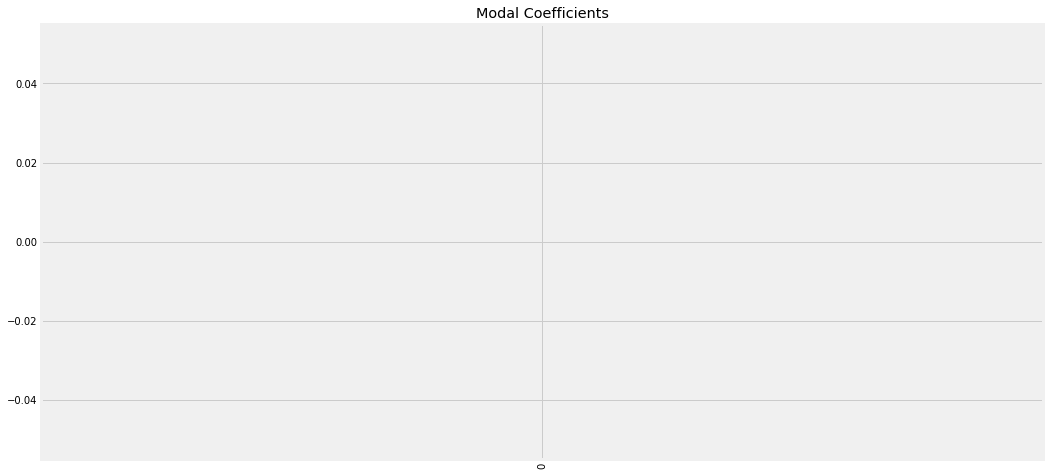

In [241]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = x_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))


In [242]:
# LASSO MODEL

lasso1 = Lasso(alpha=.1, normalize=False)
lasso1.fit(x_train,y_train)

y_train_lasso1 = lasso1.predict(x_train)
y_pred_lasso1 = lasso1.predict(x_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

Training Error: 0.544641115810163
Testing Error: 0.67104920460187
